### load mnist

In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [3]:
train_images.shape

(60000, 28, 28)

### NN Model

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28, )))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss="categorical_crossentropy", metrics=['accuracy'], optimizer='rmsprop')

In [6]:
train_images = train_images.reshape((60000, 28*28)).astype('float32')/255
test_images = test_images.reshape((10000, 28*28)).astype('float32')/255

In [9]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.2571 - accuracy: 0.9254
Epoch 2/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.1035 - accuracy: 0.9694
Epoch 3/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.0684 - accuracy: 0.9801
Epoch 4/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.0501 - accuracy: 0.9852
Epoch 5/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.0383 - accuracy: 0.9887


In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 43us/step


In [14]:
print(f'Loss: {test_loss}\nAccuracy: {test_acc}')

Loss: 0.07448080505797407
Accuracy: 0.9779999852180481


### Tensor expression

In [15]:
import numpy as np
x = np.array(12)
x.ndim

0

In [16]:
x = np.array([1, 2, 3, 4, 5])
x.ndim

1

In [17]:
x = np.array([[1, 2, 3, 4, 5],
                  [1, 2, 3, 4, 5],
                  [1, 2, 3, 4, 5]])
x.ndim

2

In [19]:
x = np.array([[[1, 2, 3, 4, 5],
                  [1, 2, 3, 4, 5],
                  [1, 2, 3, 4, 5]],
                  [[1, 2, 3, 4, 5],
                  [1, 2, 3, 4, 5],
                  [1, 2, 3, 4, 5]]])
x.ndim

3

### mnist圖

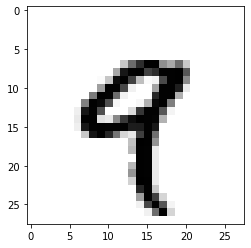

In [24]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit.reshape(28, 28), cmap=plt.cm.binary)
plt.show()

### Slice

In [28]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [30]:
my_slice = train_images[:, 7:-7, 7:-7] # 中間pixel的取法
my_slice.shape

(60000, 14, 14)

### Broadcasting

#### 用在不同形狀的張量相加，較小的張量將進行擴張

1. 較小的張量會加入新的軸，以匹配較大的張量
2. 較小的張量在這些新的軸上重複寫入元素，以匹配較大張量的shape